In [2]:
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
hedged_data_path = Path("./cauchy_delta_hedged.json")
gbm_hedged_data_path = Path("./cauchy_delta_hedged.json")
unhedged_data_path = Path("../../raw_buy.json")
with open(hedged_data_path, 'r') as f:
    hedged_data = pd.DataFrame(json.load(f))
with open(hedged_data_path, 'r') as f:
    hedged_data = pd.DataFrame(json.load(f))
with open(unhedged_data_path, 'r') as f:
    unhedged_data = pd.DataFrame(json.load(f))

In [9]:
hedged_data.head(3)

,init_value,deriv_term_value,terminal_value,strike,start_ts,expir_ts
0,1.0,1.0,1.419127,69500.0,1718020820,1718053199
1,1.0,0.0,0.886144,70500.0,1718020820,1718053199
2,1.0,0.0,0.620263,70000.0,1718020820,1718053199


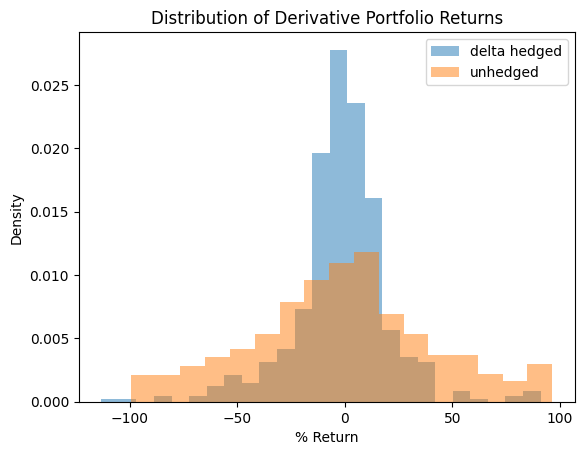

In [10]:
plt.hist(hedged_data["terminal_value"]*100-100, density=True, alpha=.5, label="delta hedged", bins=25)
plt.hist(unhedged_data["terminal_value"]*100-100, density=True, alpha=.5, label="unhedged", bins=17)
plt.title("Distribution of Derivative Portfolio Returns")
plt.xlabel("% Return")
plt.ylabel("Density")
plt.legend()
plt.savefig("delta_hedge_cauchy.png")
plt.show()

In [11]:
unhedged_var = np.var(unhedged_data["terminal_value"])
unhedged_mean = np.mean(unhedged_data["terminal_value"])
hedged_var = np.var(hedged_data["terminal_value"])
hedged_mean = np.mean(hedged_data["terminal_value"])

print(f"unhedged \n  mean: {unhedged_mean:.3}\n  var: {unhedged_var:.3}")
print(f"hedged \n  mean: {hedged_mean:.3}\n  var: {hedged_var:.3}")

unhedged 
  mean: 0.986
  var: 0.178
hedged 
  mean: 0.985
  var: 0.0497


In [ ]:
# comparing cauchy and gbm return distributions


